<a href="https://colab.research.google.com/github/Rohanrathod7/my-ds-labs/blob/main/14_Exploratory_Data_Analysis_in_Python/02_Data_Cleaning_and_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



In [3]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-labs/main/14_Exploratory_Data_Analysis_in_Python/dataset/planes.csv"
planes = pd.read_csv(url)
display(planes.head())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


**Dealing with missing data**  
It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [4]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

# By creating a missing values threshold and using it to filter columns,
#  you've managed to remove missing values from all columns except for
#  "Additional_Info" and "Price".

Airline              0
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    308
Price              412
dtype: int64


**Strategies for remaining missing data**  
The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

Additional_Info
No info                         6643
In-flight meal not included     1601
No check-in baggage included     262
1 Long layover                    15
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


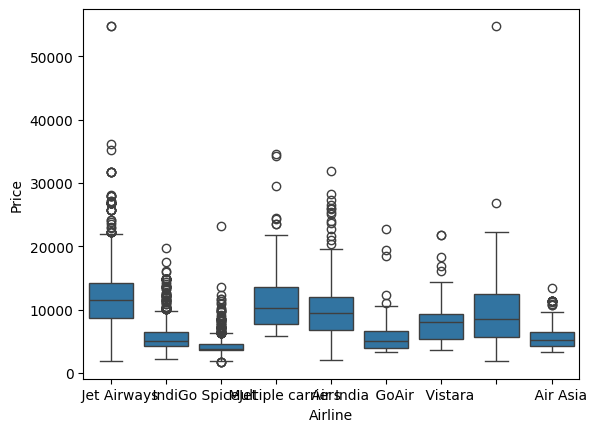

In [5]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x="Airline", y="Price")

plt.show()


# --- How should you deal with the missing values in "Additional_Info" and "Price"?
# --> Remove the "Additional_Info" column and impute the median by "Airline" for missing values of "Price".


# You don't need the "Additional_Info" column, and should impute median "Price" by "Airline" to accurately represent the data!

**Imputing missing plane prices**  
Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

Box plot of plane ticket prices by Airline

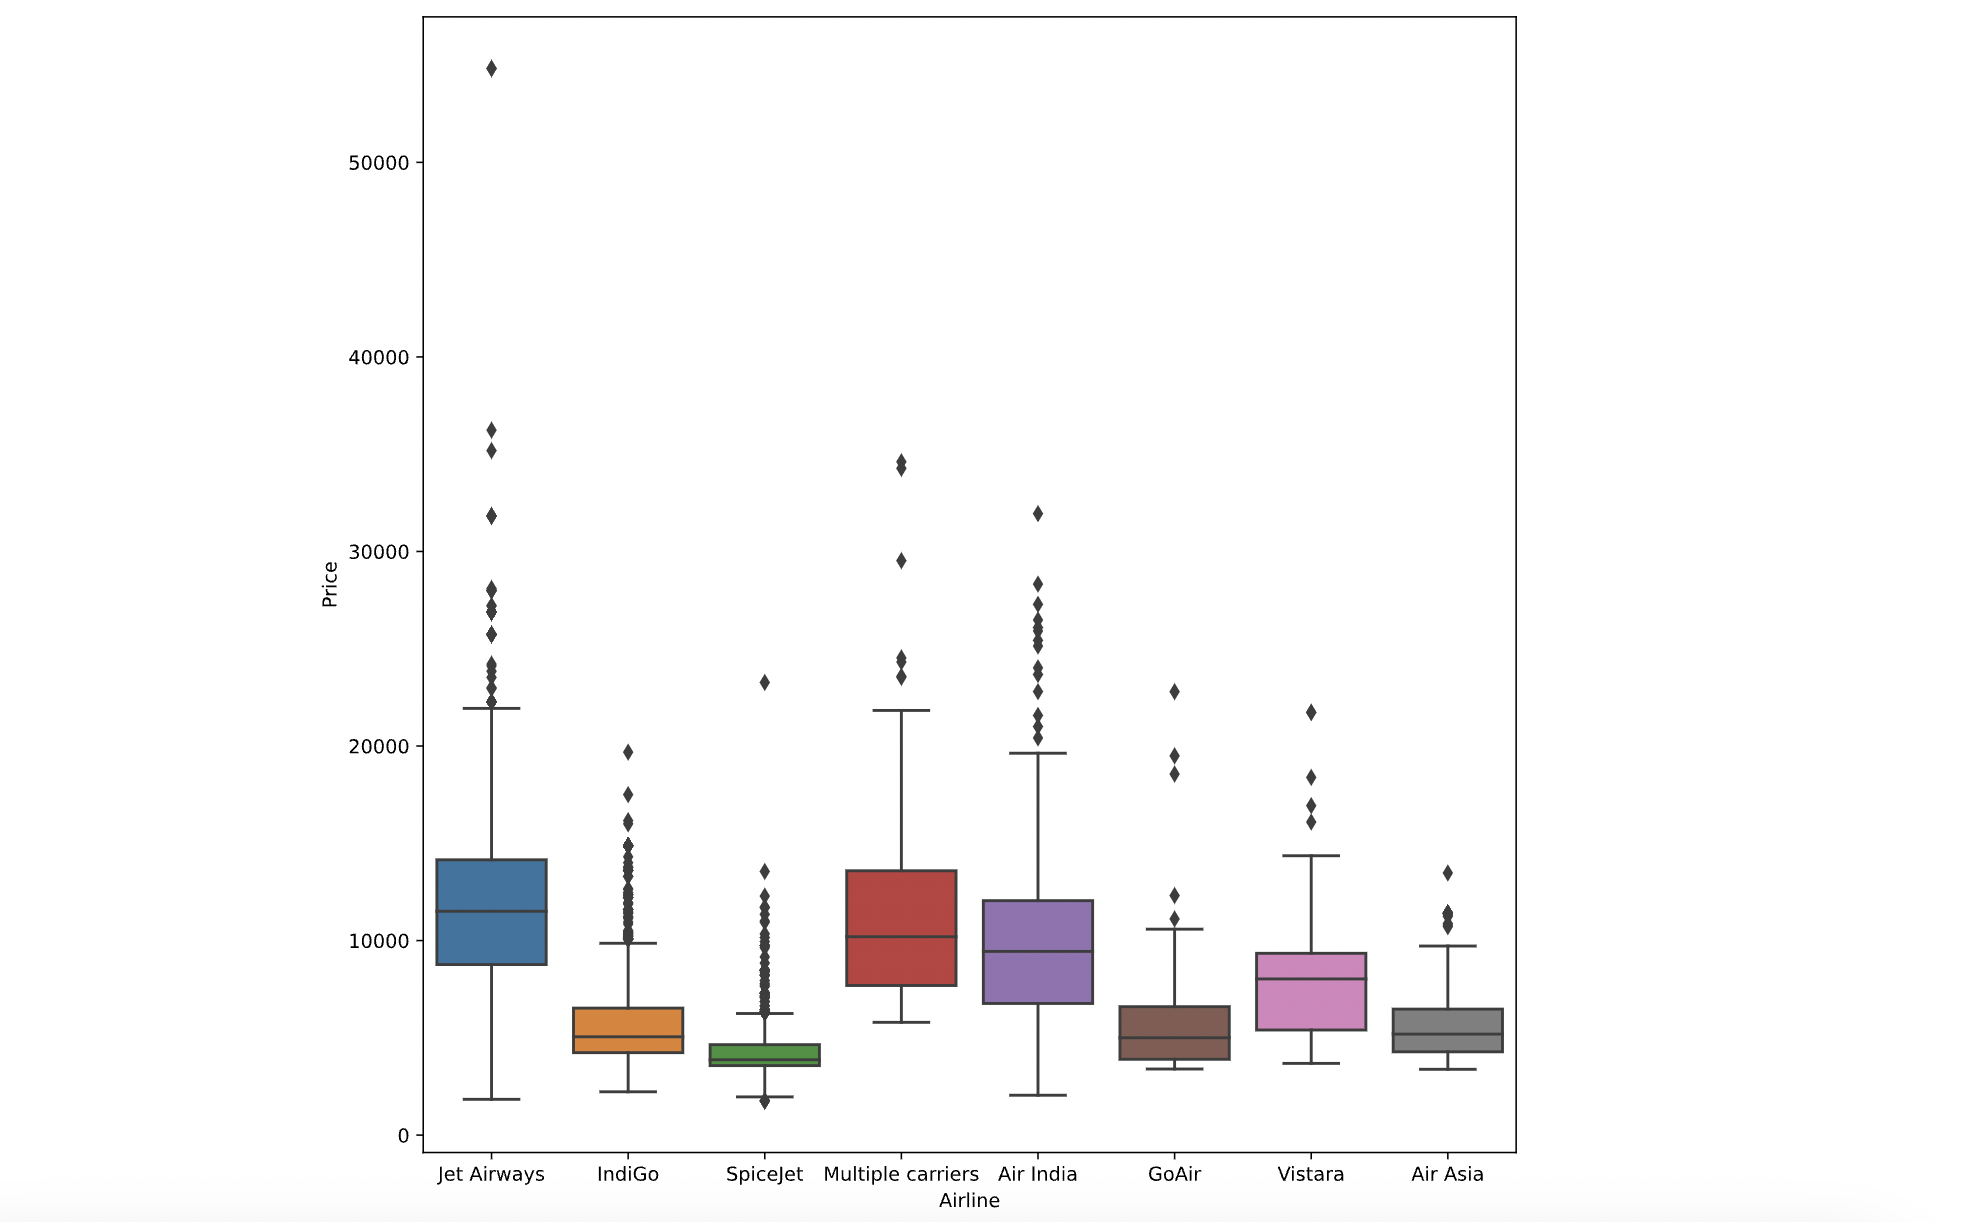

In [6]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())


# You converted a grouped DataFrame to a dictionary and then used it to
# conditionally fill missing values for "Price" based on the "Airline"!
# Now let's explore how to perform exploratory analysis on categorical data.

Airline
                      8610.0
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    308
Price                0
dtype: int64


**Finding the number of unique values**  
You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

In [7]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for data in non_numeric.columns:

  # Print the number of unique values
  print(f"Number of unique values in {data} column: ", non_numeric[data].nunique())

  # Interestingly, "Duration" is currently an object column whereas it should be a numeric column, and has 362 unique values!

Number of unique values in Airline column:  9
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  219
Number of unique values in Arrival_Time column:  1236
Number of unique values in Duration column:  366
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  9


light duration categories
As you saw, there are 362 unique values in the "Duration" column of planes. Calling planes["Duration"].head(), we see the following values:

0 __         19h  
1  __     5h 25m  
2    __   4h 45m  
3 __      2h 25m  
4   __   15h 30m  
Name: Duration, dtype: object
Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "Duration_Category" column in the planes DataFrame.

In [8]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "^10h|^11h|^12h|^13h|^14h|^15h|^16h"

**Adding duration categories**  
Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

- Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.
- Create the "Duration_Category" column by calling a function that accepts your conditions list and flight_categories, setting values not found to "Extreme duration".
- Create a plot showing the count of each category.

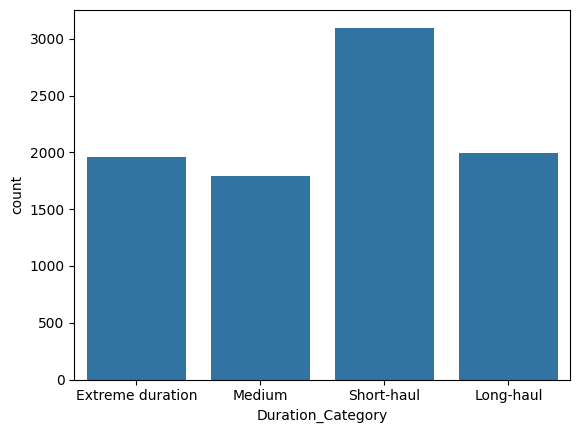

In [9]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

# Creative categorical transformation work! It's clear that the majority of
# flights are short-haul, and virtually none are longer than 16 hours! Now
# let's take a deep dive into working with numerical data.

**Adding descriptive statistics**  
Now "Duration" and "Price" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

In [10]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
                   4618.252437              333
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


In [ ]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

In [11]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

# Looks like Jet Airways has the largest standard deviation in price, Air India
# has the largest median duration, and New Delhi, on average, is the most expensive destination

Destination  price_destination_mean
Cochin       10467.050594              3785
Banglore     9100.632619               2379
Delhi        5245.227141               1039
New Delhi    11637.104839               744
Hyderabad    5165.524957                581
Kolkata      4923.891374                313
Name: count, dtype: int64


**Identifying outliers**  
You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

Try to figure out if there are outliers in the "Price" or "Duration" columns of the planes DataFrame.

In [ ]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

In [ ]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

# Display descriptive statistics for flight duration
print(planes["Duration"].describe())

**Removing outliers**  
While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "Price" is not an outlier.

Therefore, you need to find the upper threshold and then use it to remove values above this from the planes DataFrame.

In [12]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())


# You managed to create thresholds based on the IQR and used them to filter the
# planes dataset to eliminate extreme prices. Originally the dataset had a maximum
#  price of almost 55000, but the output of planes.describe() shows the maximum has
#   been reduced to around 23000, reflecting a less skewed distribution for analysis!

count     8769.000000
mean      8882.190615
std       3992.958604
min       1759.000000
25%       5228.000000
50%       8446.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64
